In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from keras.layers import *
from keras.models import *
from keras.utils.np_utils import to_categorical

path = '/Volumes/Storage/0.SAGAbackup/ARData/'


dflog = pd.read_csv(path+'eachrows_logs.tsv', 
                 sep='\t', names=['action','note','timestamp','tool','userid'])
dfuser = pd.read_csv(path + 'useranswer.csv', header=0)

#get max column 
#dflog2 = dflog.drop(columns=['timestamp','userid'])
#dflog2 = pd.get_dummies(dflog2, drop_first=True)
#dflog2.to_csv(path + 'al_all_cols.csv')
dfallcolumns = pd.read_csv(path + 'dfalluserlogcol.txt', nrows=1)


#free defined max # of a user log
maxn = 5176
maxcol = 56
#for fast comparision, get userid column as np 
nplog_userid = np.array(dflog['userid'].values)
# list var for indices of logs of the userid
idx_auser = []
# dataframe for a user 
dfauserlog = pd.DataFrame()
# Dataset for Keras model
X = []
# dummy var
cnt =0
#start loop with userid in lable dataset


Using TensorFlow backend.


In [6]:
with open(path + 'rnumoflogsperusr.txt', 'w') as fp:
    for index, row in dfuser.iterrows():
        if row['SubmitYN'] == 0:
            continue
        userid=row['UserId']
        #get indices of logs of the userid as list,you should put [0]
        idx_auser = np.where(nplog_userid ==userid)[0]
        fp.writelines(userid + ',' + str(len(idx_auser)) +'\n')
fp.close()

#Y = dataset.iloc[:,3].values

In [5]:
rnumoflogsperusr = pd.read_csv(path + 'rnumoflogsperusr.txt')


In [ ]:
#end of code

In [52]:
Z = np.empty((2698,5176,56), int)


In [50]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [49]:
X[1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

TypeError: Image data cannot be converted to float

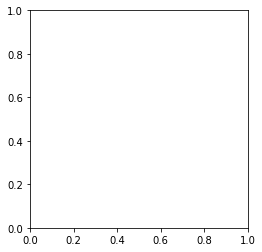

In [35]:
plt.imshow(Z[0], cmap='binary')

In [57]:
i = 0
for idx, l in enumerate(X):
    Z[idx,:,:] = l
    

ValueError: could not broadcast input array from shape (5250,56) into shape (5176,56)

In [28]:
Z[0]

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ..., 
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [62]:
dfauserlog = pd.get_dummies(dflog, drop_first=True)
dfauserlog.to_csv(path+'dfauserlog.txt', index=False)

In [61]:
dfauserlog.shape

(1381160, 56)

In [53]:
dflog['note'] = dflog['note'].apply(lambda x: re.sub(r"[^A-Za-z0-9]+", "",x))

In [54]:
dflog['note'].to_csv(path+'test.txt')

In [55]:
nplog = dflog.values


In [24]:
NP = np.empty((0,3), object)
NP = np.vstack((NP, nplog[0]))

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
nplog1 = le.fit_transform(nplog[:,1])


In [45]:
nplog

array([['Walking Through', 'ProbeDoor1', 'Gate'],
       ['Click', 'Show Tools', 'Tool Bar'],
       ['Click', 'Hide Tools', 'Tool Bar'],
       ..., 
       ['Click Left Menu', 'lander', 'missionControl'],
       ['Click Probe Button', 'Venus', 'missionControl'],
       ['Click Destination Planet', 'VENUS', 'missionControl']], dtype=object)

In [37]:
np.savetxt(path+'test.txt', nplog[:,1])

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [58]:
len(np.unique(nplog[:,1]))

9281

In [56]:
with open(path+'test2.txt', 'w') as f:
    for item in np.unique(nplog[:,1]):
        f.write("%s\n" % item)
f.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
nplog1 = le.fit_transform(nplog)
ohe = OneHotEncoder(categorical_features=[0,1,2])
nplog2 = ohe.fit_transform(nplog1).toarray()